Student name: Guanghang Chen<br>
Student number: 521084 <br>
Feb, 2, 2023  <br>

# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2023

### Prediction of the metal ion content from multi-parameter data
##### Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), for each sample using number of neighbors k = 3.<br> 

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score. (Using sklearn.preprocessing.StandardScaler is allowed)
    - Implement your own Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement your own Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it.
    - Submit to moodle your solution on ** Wednesday 8 of February ** at the latest.

## Import libraries

In [2]:
#In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsRegressor

## Read and visualize the dataset

In [3]:
#In this cell read the file Water_data.csv
#Print the dataset dimesions (i.e. number of rows and columns)
#Print the first 5 rows of the dataset

water_df = pd.read_csv('./Water_data.csv')

print(f'the dimesions of \'water_data.csv\' : {water_df.shape}' )
print("describe:\n", water_df.describe().unstack(), "\n")
print("first 5 row:")
water_df.head(5)

the dimesions of 'water_data.csv' : (225, 6)
describe:
 c_total  count       225.000000
         mean        730.320000
         std        1378.895027
         min           0.000000
         25%          35.000000
         50%         100.000000
         75%         500.000000
         max        5000.000000
Cd       count       225.000000
         mean        365.160000
         std         871.588318
         min           0.000000
         25%           8.400000
         50%          40.000000
         75%         200.000000
         max        5000.000000
Pb       count       225.000000
         mean        365.160000
         std         871.588318
         min           0.000000
         25%           8.400000
         50%          40.000000
         75%         200.000000
         max        5000.000000
Mod1     count       225.000000
         mean     109791.906667
         std      100148.061764
         min        7919.000000
         25%       20597.000000
         50%    

,c_total,Cd,Pb,Mod1,Mod2,Mod3
0,0,0.0,0.0,9945,119,72335
1,0,0.0,0.0,10786,117,82977
2,0,0.0,0.0,10812,120,98594
3,14,0.0,14.0,9742,127,154323
4,14,0.0,14.0,8495,120,131672


#### To show understanding of the data, answer the following questions:
- How many different mixtures of Cadmium (Cd) and Lead (Pb) were measured? <br>
- How many total concentrations (c_total) were measured? <br>
- How many mixtures have less than 4 replicas? <br>
- Make plots of Lead (Pb) and Cadmium (Cd) mixtures for low and high concentrations. <br>
Where low concentrations are those with c_total <= 100, while in high concentration c_total > 100.<br>
Hint: plots are similar to the ones presented in the video lecture.  

There are 67 different mixtures of Cadmium(Cd) and Lead(Pb) were measured.
There are 12 total concentrations(c_total) were measured.
There are 43 mixture have less than 4 replicas.


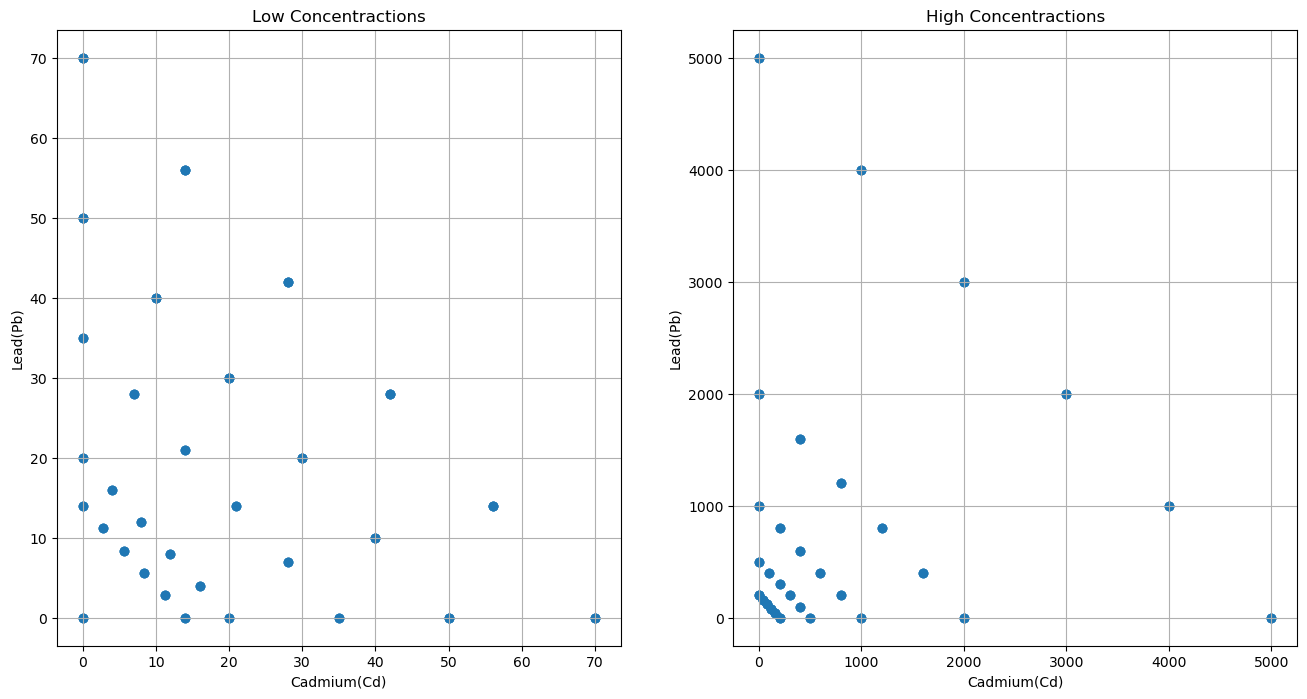

In [4]:
#In this cell write the code to answer the previous questions and print the answers.

mixtures_count = len(water_df[['Cd', 'Pb']].value_counts())
concentrations_count = len(water_df['c_total'].value_counts())
replicas_count = sum(item < 4 for item in water_df[['Cd', 'Pb']].value_counts())

print(f'There are {mixtures_count} different mixtures of Cadmium(Cd) and Lead(Pb) were measured.')
print(f'There are {concentrations_count} total concentrations(c_total) were measured.')
print(f'There are {replicas_count} mixture have less than 4 replicas.')


fig = plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(water_df[water_df['c_total'] < 100]['Cd'], water_df[water_df['c_total'] < 100]['Pb'])
ax1.set_title("Low Concentractions")
ax1.set_xlabel("Cadmium(Cd)")
ax1.set_ylabel("Lead(Pb)")
ax1.grid()

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(water_df[water_df['c_total'] > 100]['Cd'], water_df[water_df['c_total'] > 100]['Pb'])
ax2.set_title("High Concentractions")
ax2.set_xlabel("Cadmium(Cd)")
ax2.set_ylabel("Lead(Pb)")
ax2.grid()

## Standardization of the dataset

In [5]:
#In this cell standardize the dataset features by removing the mean and scaling to unit variance. 
#In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
#Print the 5 first samples (i.e. rows) of the scaled dataset

x_df = water_df[['Mod1', 'Mod2', 'Mod3']]
y_df = water_df[['c_total','Cd', 'Pb']]
print(f'features before z-score \nmean\n{np.mean(x_df)} \nstd\n{np.std(x_df)}')


x_df = (x_df - x_df.mean() ) / x_df.std()
print(f'features after z-score \nmean\n{np.mean(x_df)} \nstd\n{np.std(x_df)}')

x_df.head(5)

features before z-score 
mean
Mod1    109791.906667
Mod2      8757.546667
Mod3     97341.133333
dtype: float64 
std
Mod1    99925.262685
Mod2    12095.289052
Mod3    60268.600882
dtype: float64
features after z-score 
mean
Mod1    3.157968e-17
Mod2   -9.473903e-17
Mod3    6.315935e-17
dtype: float64 
std
Mod1    0.997775
Mod2    0.997775
Mod3    0.997775
dtype: float64


c:\Users\box69\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Mod1,Mod2,Mod3
0,-0.996993,-0.712619,-0.413988
1,-0.988595,-0.712784,-0.237805
2,-0.988336,-0.712536,0.020742
3,-0.999020,-0.711959,0.943362
4,-1.011471,-0.712536,0.568364


## C-index code 

In [37]:
"""
C-index function: 
- INPUTS: 
'y' an array of the true output values
'yp' an array of predicted output values
- OUTPUT: 
The c-index value
"""
def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels"""  
    n = 0
    h_num = 0
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt):
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_num += 1
                elif (p==np):
                    h_num += 0.5
                    
    
    return h_num / n




In [38]:
#test cindex function with following values
true_labels = [-1, 1, 1, -1, 1]
predictions = [0.60, 0.80, 0.75, 0.75, 0.70]
cindx = cindex(true_labels, predictions)
print(cindx)

0.75


## Functions

Include here all the functions that you need to run in the data analysis part.<br>
**Note:** using a leave-one-out and leave-replicas-out cross-validation from an already made package (e.g. Scikit-learn) is not accepted.

In [75]:
# implementation of useful functions in data analysis part
knn = KNeighborsRegressor(n_neighbors=3) # create regressor instance

# data prepartion
x_data, x_columns = x_df.to_numpy(), x_df.columns
y_data, y_columns = y_df.to_numpy(), y_df.columns

print(f'x_data : {x_data.shape}  x_columns : {x_columns}')
print(f'y_data : {y_data.shape}  y_columns : {y_columns}')



def loo_cv(x_data, y_true, model):

   y_pred = []
   for test_idx in range(x_data.shape[0]):
        x_train = np.delete(x_data, test_idx, axis=0)
        y_train = np.delete(y_true, test_idx)
        model.fit(x_train, y_train)
        #print(x_train.shape, y_train.shape, x_data[test_idx].shape)
        pred = model.predict(x_data[test_idx].reshape(1, -1))
        y_pred.append(pred)
        
     
   print(np.array(y_pred).shape)
        
   return cindex(y_true, y_pred)




x_data : (225, 3)  x_columns : Index(['Mod1', 'Mod2', 'Mod3'], dtype='object')
y_data : (225, 3)  y_columns : Index(['c_total', 'Cd', 'Pb'], dtype='object')


## Results for Leave-One-Out cross-validation

In [76]:
#In this cell run your script for Leave-One-Out cross-validation and print the corresponding results.

y_true_ctotal = y_data[:, 0]
y_true_cd = y_data[:, 1]
y_true_pb = y_data[:, 2]

    
cindx_cotal = loo_cv(x_data, y_true_ctotal, knn)
cindx_cd = loo_cv(x_data, y_true_cd, knn)
cindx_pb = loo_cv(x_data, y_true_pb, knn)


print(f'c-index of c-total feature prediction : {cindx_cotal}')
print(f'c-index of Cd feature prediction : {cindx_cd}')
print(f'c-index of Pb feature prediction : {cindx_pb}')

(225, 1)
(225, 1)
(225, 1)
c-index of c-total feature prediction : 0.9141907740422205
c-index of Cd feature prediction : 0.8995907629348144
c-index of Pb feature prediction : 0.8744519146448407


## Results for Leave-Replicas-Out cross-validation

In [96]:
#In this cell run your script for Leave-Replicas-Out cross-validation and print the corresponding results.


def lro_cv(x_data, y_true, groups_mask, model):
     """implementation of Leave-Replicas-Out (LRO) cross-validation
     INPUTS:
         x_data (np.ndarray): features matrix
         y_true (np.ndarray): true label matrix
         groups_mask (np.ndarray): groups index for replicas
     OUTPUTS:
         cv_score (np.ndarray): list of replicas c-index score
     """
     
     y_pred = []
     for mask in np.unique(groups_mask):
        x_group, y_group = x_data[mask], y_true[mask]
        #print(mask)
        
        y_pred_replica, y_true_replica = [], []
        for test_idx in mask:
            #print(test_idx)
            x_test = x_data[test_idx]
            x_train = np.delete(x_data, mask, axis=0)  # leave replicas out, train expect replicas
            y_train = np.delete(y_true, mask)
            #print(x_train.shape, y_train.shape, x_test.shape)
            model.fit(x_train, y_train)
            pred = model.predict(x_test.reshape(1, -1))[0]
            #print(pred, y_true[test_idx])
            y_pred.append(pred)
            
        
        
     return cindex(y_true, y_pred)
     
        
        
# create group mask for leave-replicas-out cross-validation
groups_mask = np.array([list(item) for item in y_df.groupby(['c_total', 'Cd', 'Pb']).groups.values()])
print(f"groups_mask : len: {len(groups_mask)} type: {type(groups_mask)}")



cindx_lro_cotal = lro_cv(x_data, y_true_ctotal, groups_mask, knn)
cindx_lro_cd = lro_cv(x_data, y_true_cd, groups_mask, knn)
cindx_lro_pb = lro_cv(x_data, y_true_pb, groups_mask, knn)


print(f'c-index of c-total feature prediction : {cindx_lro_cotal}')
print(f'c-index of Cd feature prediction : {cindx_lro_cd}')
print(f'c-index of Pb feature prediction : {cindx_lro_pb}')





C:\Users\box69\AppData\Local\Temp\ipykernel_25144\254690122.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  groups_mask = np.array([list(item) for item in y_df.groupby(['c_total', 'Cd', 'Pb']).groups.values()])


groups_mask : len: 67 type: <class 'numpy.ndarray'>
c-index of c-total feature prediction : 0.8186734427938493
c-index of Cd feature prediction : 0.7614523739925669
c-index of Pb feature prediction : 0.7689480937069362


## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation approach had more optimistic results?

answer: 

leave-one-out cross validation has more optimistic result. because leave-one-out cross validation might introduce nearly identical data for training and validation, while ensuring that each replicate sample is used. while in leave-replicas-out cross-validation, validation set would only sample one from replicas, which bring more effective and robust result esapcaliy for replicas samples.

- Which cross-validation generalize better on unseen data? Why?


answer: 

In the Leave-Replicas-Out cross-validation, each set of repeated data is used only once as the validation set, and the remaining data is used as the training set. In the leave-one-out cross-validation, each repeated data set can be used as the validation set, and the training set contains all other data. Therefore, Leave-Replicas-Out cross-validation provides a more accurate evaluation and better reflects the generalization performance of the data.

Translated with www.DeepL.com/Translator (free version)


In [ ]:
#In this cell write your answers to the questions about Interpretation of Results.